In [1]:
!pip install tensorflow
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install tabulate

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
from PIL import Image
import os

In [3]:
#print the current directory
print(os.getcwd())

/tf/Purushothaman/6 Class model


In [5]:
images = []
labels = []

master_data_path = "/tf/Purushothaman/6_class_combined_data"



def load_images_and_labels(folder_path, label):
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isdir(file_path):
            load_images_and_labels(file_path, filename)
        elif filename.lower().endswith(('png', 'jpeg', 'jpg')):
            try:
                img = Image.open(file_path)
                images.append(img)
                labels.append(label)
            except Exception as e:
                print(f'Error loading the image {file_path}: {str(e)}')
        else:
            print(f'Skipping non-image file: {file_path}')
            
for folder_name in os.listdir(master_data_path):
    folder_path = os.path.join(master_data_path, folder_name)
    if os.path.isdir(folder_path):
        load_images_and_labels(folder_path, folder_name)
        
        
print(f'Images loaded: {len(images)}')
print(f'Images loaded: {len(labels)}')

Images loaded: 2989
Images loaded: 2989


In [6]:
#counting the number of labels in each classes

count_of_classes = {}

for label in labels:
    if label in count_of_classes:
        count_of_classes[label] +=1
    else:
        count_of_classes[label] = 1
        
        
for key, value in count_of_classes.items():
    print(f'{key}:{value}')

ship:753
plane:123
human:34
fish:1334
mine:167
seafloor:578


In [8]:
dimension = []
for idx, image in enumerate(images):
    width, height = image.size
    current_dimension = (width, height)
    dimension.append(current_dimension)
    
unique_dimension = list(set(dimension))
print(f'Unique dimension in the dataset: {len(unique_dimension)}')

Unique dimension in the dataset: 1319


In [9]:
import numpy as np

In [10]:
# Convert PIL images to numpy arrays
numpy_images = [np.array(image) for image in images]

# Resize and convert images to RGB format if necessary
target_size = (224, 224)
reshaped_images = []
for idx, image in enumerate(numpy_images):
    pil_image = Image.fromarray(image)
    pil_image = pil_image.resize(target_size)
    # Convert to RGB if image is grayscale
    if pil_image.mode != 'RGB':
        pil_image = pil_image.convert('RGB')
    reshaped_images.append(np.array(pil_image))


print("Dimension of reshaped_images:", reshaped_images[0].shape)

print("Data type of reshaped_images:", reshaped_images[0].dtype)
                    
    
# Convert images to float32 and normalize to [0, 1]
normalized_images = np.array(reshaped_images, dtype=np.float32) / 255.0

# Verify the shape and data type of processed_images
print("Shape of normalized_images:", normalized_images.shape)
print("Data type of processed_images:", normalized_images.dtype)

Dimension of reshaped_images: (224, 224, 3)
Data type of reshaped_images: uint8
Shape of normalized_images: (2989, 224, 224, 3)
Data type of processed_images: float32


In [11]:
import matplotlib.pyplot as plt

ship


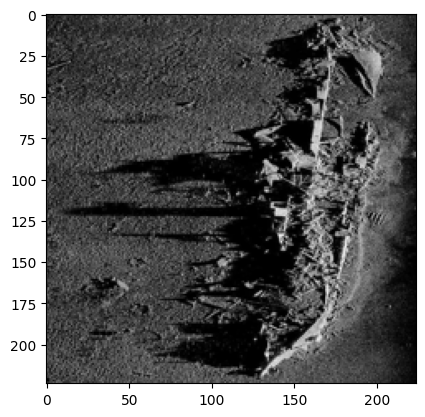

In [12]:
print(labels[0])
plt.imshow(normalized_images[0])
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [15]:

# Initialize empty lists to store processed images and corresponding labels
processed_images = []
processed_labels = []

# Load, preprocess, and align images and labels
for image, label in zip(normalized_images, labels):
    try:
        processed_images.append(image)
        processed_labels.append(label)
    except Exception as e:
        print(f"Error processing image {image_path}: {str(e)}")

# Convert labels to one-hot encoding
label_encoder = LabelEncoder()
integer_encoded_labels = label_encoder.fit_transform(processed_labels)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded_labels = integer_encoded_labels.reshape(len(integer_encoded_labels), 1)
onehot_encoded_labels = onehot_encoder.fit_transform(integer_encoded_labels)

# Convert processed_images and onehot_encoded_labels to numpy arrays
processed_images = np.array(processed_images)
onehot_encoded_labels = np.array(onehot_encoded_labels)

# Save processed_images and onehot_encoded_labels in the current directory
np.save("processed_images.npy", processed_images)
np.save("onehot_encoded_labels.npy", onehot_encoded_labels)

# Verify the shapes of processed_images and onehot_encoded_labels
print("Shape of processed_images:", processed_images.shape)
print("Shape of onehot_encoded_labels:", onehot_encoded_labels.shape)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Shape of processed_images: (2989, 224, 224, 3)
Shape of onehot_encoded_labels: (2989, 6)


# Model Development

In [16]:
# Import ResNeXt50 from tensorflow.keras.applications
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, InceptionV3, DenseNet121, MobileNetV2, Xception

In [17]:
#importing the model & dense layer for customizing the neural network
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [18]:
#input shape & dimension for the pre-trained models
shape=(224, 224, 3)

In [19]:
# Load pre-trained models
base_model_1 = VGG16(weights='imagenet', include_top=False, input_shape=shape)
base_model_2 = VGG19(weights='imagenet', include_top=False, input_shape=shape)
base_model_3 = ResNet50(weights='imagenet', include_top=False, input_shape=shape)
base_model_4 = InceptionV3(weights='imagenet', include_top=False, input_shape=shape)
base_model_5 = DenseNet121(weights='imagenet', include_top=False, input_shape=shape)
base_model_6 = MobileNetV2(weights='imagenet', include_top=False, input_shape=shape)
base_model_7 = Xception(weights='imagenet', include_top=False, input_shape=shape)

print('Loaded')

Loaded


In [20]:
base_models = [base_model_1, base_model_2, base_model_3, 
               base_model_4, base_model_5, base_model_6, 
               base_model_7]

In [21]:
# Looping through the Base models and printing the summaries
for idx, model in enumerate(base_models):
    print(f'Summary of Base Model {idx +1}:')
    model.summary()

Summary of Base Model 1:
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [22]:
#Freezing the pre-trained model's last layer for transfer learning
for model in base_models:
    for layer in model.layers:
        layer.trainable=False

## Customize the model

In [23]:
custom_models = []

for idx, model in enumerate(base_models):
    x = model.output
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(6, activation='softmax')(x)
    custom_model = Model(inputs=model.input, outputs=predictions)
    custom_models.append(custom_model)
    print(f"Customized the model - {idx+1}")

Customized the model - 1
Customized the model - 2
Customized the model - 3
Customized the model - 4
Customized the model - 5
Customized the model - 6
Customized the model - 7


In [24]:
# Looping through the Base models and printing the summaries
for idx, model in enumerate(custom_models):
    print(f'Summary of Custom Model {idx +1}:')
    model.summary()

Summary of Custom Model 1:
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Compile the model

In [25]:
compiled_models = []
for idx, custom_model in enumerate(custom_models):
    custom_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    compiled_models.append(custom_model)
    print(f"Compiled Custom Model {idx + 1}")

Compiled Custom Model 1
Compiled Custom Model 2
Compiled Custom Model 3
Compiled Custom Model 4
Compiled Custom Model 5
Compiled Custom Model 6
Compiled Custom Model 7


In [26]:
for idx, model in enumerate(compiled_models):
    print(f'Summary of compiled model {idx +1}: ')
    model.summary()

Summary of compiled model 1: 
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (N

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Train the model

In [27]:
!pip install seaborn

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [28]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [29]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(processed_images, onehot_encoded_labels, test_size=0.2, random_state=42)

# Verify the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2391, 224, 224, 3)
Shape of y_train: (2391, 6)
Shape of X_test: (598, 224, 224, 3)
Shape of y_test: (598, 6)


In [30]:
def train_and_evaluate_models(X_train, y_train, X_test, y_test, compiled_models, model_names, epochs=100):
    results = []
    for model, model_name in zip(compiled_models, model_names):
        # Initialize variables for tracking maximum accuracy
        max_accuracy = 0
        max_accuracy_epoch = 0

        # Define a checkpoint to save the model when target accuracy is reached
        checkpoint = ModelCheckpoint(f'{model_name}_model.h5', monitor='val_accuracy', 
                                     save_best_only=True, save_weights_only=False, mode='max', verbose=1)

        # Define early stopping to stop training if accuracy doesn't improve for 10 epochs
        early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)

        # Train the current model 
        history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=32, callbacks=[checkpoint, early_stopping])
        
        
        current_epoch_predictions = []
        current_epoch_labels = []
        
        for epoch, val_accuracy in enumerate(history.history['val_accuracy'], 1):
            # Check if the current epoch achieves higher accuracy than the previous maximum
            if val_accuracy > max_accuracy:
                max_accuracy = val_accuracy
                max_accuracy_epoch = epoch
                current_epoch_predictions = model.predict(X_test)
                current_epoch_labels = y_test.argmax(axis=1)

        # Get the maximum accuracy and the corresponding epoch
        max_accuracy_epoch = np.argmax(history.history['val_accuracy'])
        max_accuracy = history.history['val_accuracy'][max_accuracy_epoch]

        # Evaluate the model on the test data
        test_loss, test_accuracy = model.evaluate(X_test, y_test)
        print(f'Test Accuracy for {model_name}: {test_accuracy}')

        # Store results
        results.append({'Model': model_name, 'Accuracy': max_accuracy})

        print("-" * 40)  # Print a line of dashes 
        print(f"Maximum accuracy of {max_accuracy:.2f} achieved at epoch {max_accuracy_epoch+1}")
        print("Model with high accuracy is saved using the keras ModelCheckpoint")
        print("-" * 40)  # Print a line of dashes 
        print("\n")

        # Assuming model.predict returns probabilities for each class
        y_pred_probs = model.predict(X_test)

        # Convert probabilities to class labels
        y_pred = np.argmax(y_pred_probs, axis=1)

        # Convert true labels to class labels if y_test is one-hot encoded
        y_true = np.argmax(y_test, axis=1)

        # Generate confusion matrix
        conf_matrix = confusion_matrix(y_true, y_pred)

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(model_name)
        plt.show()
    return results


In [31]:
count_of_classes

{'ship': 753,
 'plane': 123,
 'human': 34,
 'fish': 1334,
 'mine': 167,
 'seafloor': 578}

In [32]:
model_names = ["VGG16", "VGG19", "ResNet50", "InceptionV3", "DenseNet121", "MobileNetV2", "Xception"]
class_labels = ['Ship','Plane','Human', 'Fish', 'Mine', 'Seafloor']

Epoch 1/100
75/75 [==============================] - ETA: 0s - loss: 0.2933 - accuracy: 0.9072
Epoch 1: val_accuracy improved from -inf to 0.95819, saving model to VGG16_model.h5
75/75 [==============================] - 70s 915ms/step - loss: 0.2933 - accuracy: 0.9072 - val_loss: 0.1414 - val_accuracy: 0.9582
Epoch 2/100
75/75 [==============================] - ETA: 0s - loss: 0.0649 - accuracy: 0.9757
Epoch 2: val_accuracy did not improve from 0.95819
75/75 [==============================] - 67s 890ms/step - loss: 0.0649 - accuracy: 0.9757 - val_loss: 0.1661 - val_accuracy: 0.9365
Epoch 3/100
75/75 [==============================] - ETA: 0s - loss: 0.0362 - accuracy: 0.9875
Epoch 3: val_accuracy did not improve from 0.95819
75/75 [==============================] - 66s 884ms/step - loss: 0.0362 - accuracy: 0.9875 - val_loss: 0.1413 - val_accuracy: 0.9548
Epoch 4/100
75/75 [==============================] - ETA: 0s - loss: 0.0183 - accuracy: 0.9954
Epoch 4: val_accuracy improved from 0.

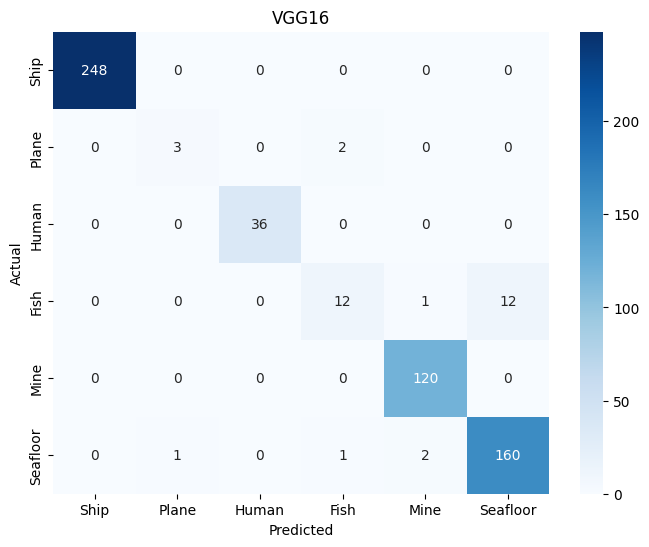

Epoch 1/100
75/75 [==============================] - ETA: 0s - loss: 0.3003 - accuracy: 0.9122
Epoch 1: val_accuracy improved from -inf to 0.95987, saving model to VGG19_model.h5
75/75 [==============================] - 116s 2s/step - loss: 0.3003 - accuracy: 0.9122 - val_loss: 0.1287 - val_accuracy: 0.9599
Epoch 2/100
75/75 [==============================] - ETA: 0s - loss: 0.0796 - accuracy: 0.9716
Epoch 2: val_accuracy did not improve from 0.95987
75/75 [==============================] - 106s 1s/step - loss: 0.0796 - accuracy: 0.9716 - val_loss: 0.1200 - val_accuracy: 0.9599
Epoch 3/100
75/75 [==============================] - ETA: 0s - loss: 0.0524 - accuracy: 0.9803
Epoch 3: val_accuracy improved from 0.95987 to 0.96154, saving model to VGG19_model.h5
75/75 [==============================] - 109s 1s/step - loss: 0.0524 - accuracy: 0.9803 - val_loss: 0.1185 - val_accuracy: 0.9615
Epoch 4/100
75/75 [==============================] - ETA: 0s - loss: 0.0284 - accuracy: 0.9933
Epoch 4:

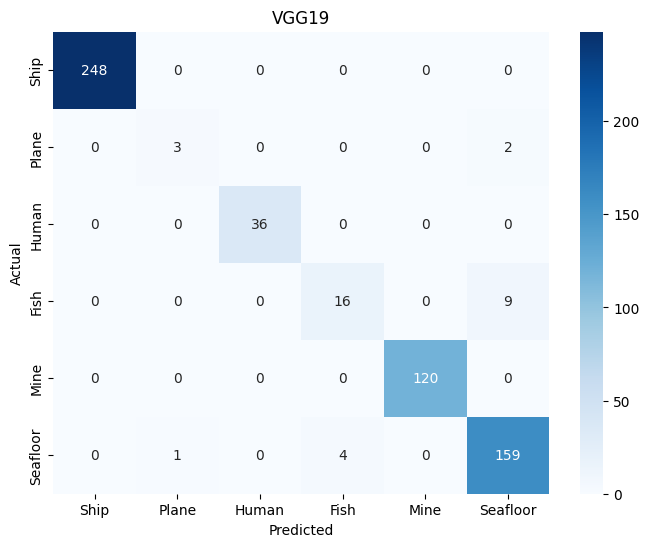

Epoch 1/100
75/75 [==============================] - ETA: 0s - loss: 1.4854 - accuracy: 0.6633
Epoch 1: val_accuracy improved from -inf to 0.76589, saving model to ResNet50_model.h5
75/75 [==============================] - 108s 1s/step - loss: 1.4854 - accuracy: 0.6633 - val_loss: 0.7632 - val_accuracy: 0.7659
Epoch 2/100
75/75 [==============================] - ETA: 0s - loss: 0.5722 - accuracy: 0.8172
Epoch 2: val_accuracy improved from 0.76589 to 0.81438, saving model to ResNet50_model.h5
75/75 [==============================] - 99s 1s/step - loss: 0.5722 - accuracy: 0.8172 - val_loss: 0.4776 - val_accuracy: 0.8144
Epoch 3/100
75/75 [==============================] - ETA: 0s - loss: 0.4246 - accuracy: 0.8683
Epoch 3: val_accuracy improved from 0.81438 to 0.82274, saving model to ResNet50_model.h5
75/75 [==============================] - 101s 1s/step - loss: 0.4246 - accuracy: 0.8683 - val_loss: 0.4294 - val_accuracy: 0.8227
Epoch 4/100
75/75 [==============================] - ETA: 0

In [ ]:
#Train and Evaluate the model
results = train_and_evaluate_models(X_train, y_train, X_test, y_test, compiled_models, model_names, epochs=100)

In [44]:
import pandas as pd

results_df = pd.DataFrame(results)
print(results_df)

         Model  Accuracy
0        VGG16  0.969900
1        VGG19  0.973244
2     ResNet50  0.946488
3  InceptionV3  0.976589
4  DenseNet121  0.969900
5  MobileNetV2  0.973244
6     Xception  0.971572


In [46]:
from tabulate import tabulate

# Define the headers for the table
headers = ["Model", "Test Accuracy"]

# Print the table
print('Models Accuracy :- 6 Classes : Unbalanced')
print(tabulate(results_df, headers, tablefmt="grid"))

Models Accuracy :- 6 Classes : Unbalanced
+----+-------------+-----------------+
|    | Model       |   Test Accuracy |
+====+=============+=================+
|  0 | VGG16       |        0.9699   |
+----+-------------+-----------------+
|  1 | VGG19       |        0.973244 |
+----+-------------+-----------------+
|  2 | ResNet50    |        0.946488 |
+----+-------------+-----------------+
|  3 | InceptionV3 |        0.976589 |
+----+-------------+-----------------+
|  4 | DenseNet121 |        0.9699   |
+----+-------------+-----------------+
|  5 | MobileNetV2 |        0.973244 |
+----+-------------+-----------------+
|  6 | Xception    |        0.971572 |
+----+-------------+-----------------+


## Lets try different Hyper-parameters 

In [ ]:
compiled_models = []
for idx, custom_model in enumerate(custom_models):
    custom_model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    compiled_models.append(custom_model)
    print(f"Compiled Custom Model {idx + 1}")

for idx, model in enumerate(compiled_models):
    print(f'Summary of compiled model {idx +1}: ')
    model.summary()

In [ ]:
def train_and_evaluate_models(X_train, y_train, X_test, y_test, compiled_models, model_names, epochs=100):
    results = []
    for model, model_name in zip(compiled_models, model_names):
        # Initialize variables for tracking maximum accuracy
        max_accuracy = 0
        max_accuracy_epoch = 0

        # Define a checkpoint to save the model when target accuracy is reached
        checkpoint = ModelCheckpoint(f'{model_name}_model_RMSprop.h5', monitor='val_accuracy', 
                                     save_best_only=True, save_weights_only=False, mode='max', verbose=1)

        # Define early stopping to stop training if accuracy doesn't improve for 10 epochs
        early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)

        # Train the current model 
        history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size=16, callbacks=[checkpoint, early_stopping])
        
        
        current_epoch_predictions = []
        current_epoch_labels = []
        
        for epoch, val_accuracy in enumerate(history.history['val_accuracy'], 1):
            # Check if the current epoch achieves higher accuracy than the previous maximum
            if val_accuracy > max_accuracy:
                max_accuracy = val_accuracy
                max_accuracy_epoch = epoch
                current_epoch_predictions = model.predict(X_test)
                current_epoch_labels = y_test.argmax(axis=1)

        # Get the maximum accuracy and the corresponding epoch
        max_accuracy_epoch = np.argmax(history.history['val_accuracy'])
        max_accuracy = history.history['val_accuracy'][max_accuracy_epoch]

        # Evaluate the model on the test data
        test_loss, test_accuracy = model.evaluate(X_test, y_test)
        print(f'Test Accuracy for {model_name}: {test_accuracy}')

        # Store results
        results.append({'Model': model_name, 'Accuracy': max_accuracy})

        print("-" * 40)  # Print a line of dashes 
        print(f"Maximum accuracy of {max_accuracy:.2f} achieved at epoch {max_accuracy_epoch+1}")
        print("Model with high accuracy is saved using the keras ModelCheckpoint")
        print("-" * 40)  # Print a line of dashes 
        print("\n")

        # Assuming model.predict returns probabilities for each class
        y_pred_probs = model.predict(X_test)

        # Convert probabilities to class labels
        y_pred = np.argmax(y_pred_probs, axis=1)

        # Convert true labels to class labels if y_test is one-hot encoded
        y_true = np.argmax(y_test, axis=1)

        # Generate confusion matrix
        conf_matrix = confusion_matrix(y_true, y_pred)

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(model_name)
        plt.show()
    return results

In [ ]:
#Train and Evaluate the model
RMSprop_results = train_and_evaluate_models(X_train, y_train, X_test, y_test, compiled_models, model_names, epochs=100)

In [42]:
RMSprop_results_df = pd.DataFrame(RMSprop_results)
print(RMSprop_results_df)

         Model  Accuracy
0        VGG16  0.966555
1        VGG19  0.971572
2     ResNet50  0.944816
3  InceptionV3  0.976589
4  DenseNet121  0.979933
5  MobileNetV2  0.973244
6     Xception  0.969900


In [43]:
from tabulate import tabulate

# Define the headers for the table
headers = ["Model", "Test Accuracy"]

# Print the table
print('Models Accuracy :- 6 Classes : Unbalanced')
print(tabulate(RMSprop_results_df, headers, tablefmt="grid"))

Models Accuracy :- 3 Classes : 224 images/class
+----+-------------+-----------------+
|    | Model       |   Test Accuracy |
+====+=============+=================+
|  0 | VGG16       |        0.966555 |
+----+-------------+-----------------+
|  1 | VGG19       |        0.971572 |
+----+-------------+-----------------+
|  2 | ResNet50    |        0.944816 |
+----+-------------+-----------------+
|  3 | InceptionV3 |        0.976589 |
+----+-------------+-----------------+
|  4 | DenseNet121 |        0.979933 |
+----+-------------+-----------------+
|  5 | MobileNetV2 |        0.973244 |
+----+-------------+-----------------+
|  6 | Xception    |        0.9699   |
+----+-------------+-----------------+


In [48]:
print("6 Class Unbalanced Data")
print("Model with 'Adam' Optimizer")
print(results_df)
print('---' * 10)
print("Model with 'RMSprop' Optimizer")
print(RMSprop_results_df)

6 Class Unbalanced Data
Model with 'Adam' Optimizer
         Model  Accuracy
0        VGG16  0.969900
1        VGG19  0.973244
2     ResNet50  0.946488
3  InceptionV3  0.976589
4  DenseNet121  0.969900
5  MobileNetV2  0.973244
6     Xception  0.971572
------------------------------
Model with 'RMSprop' Optimizer
         Model  Accuracy
0        VGG16  0.966555
1        VGG19  0.971572
2     ResNet50  0.944816
3  InceptionV3  0.976589
4  DenseNet121  0.979933
5  MobileNetV2  0.973244
6     Xception  0.969900


# load model and predict 

In [49]:
os.getcwd()

'/tf/Purushothaman/6 Class model'

In [50]:
import os
import tensorflow as tf

directory_path = '/tf/Purushothaman/6 Class model'
loaded_models = {}

for filename in os.listdir(directory_path):
    if filename.endswith(".h5"):  # Assuming the models are saved in HDF5 format with .h5 extension
        model_name = os.path.splitext(filename)[0]  # Get the model name without extension
        model_path = os.path.join(directory_path, filename)
        loaded_model = tf.keras.models.load_model(model_path)  # Load the model using TensorFlow
        loaded_models[model_name] = loaded_model

# Print the loaded model names
print("Loaded model names:")
print(list(loaded_models.keys()))

Loaded model names:
['VGG19_model_RMSprop', 'VGG16_model_RMSprop', 'InceptionV3_model_RMSprop', 'VGG16_model', 'VGG19_model', 'MobileNetV2_model_RMSprop', 'ResNet50_model', 'MobileNetV2_model', 'Xception_model_RMSprop', 'ResNet50_model_RMSprop', 'Xception_model', 'DenseNet121_model_RMSprop', 'DenseNet121_model', 'InceptionV3_model']


19/19 [==============================] - 21s 1s/step


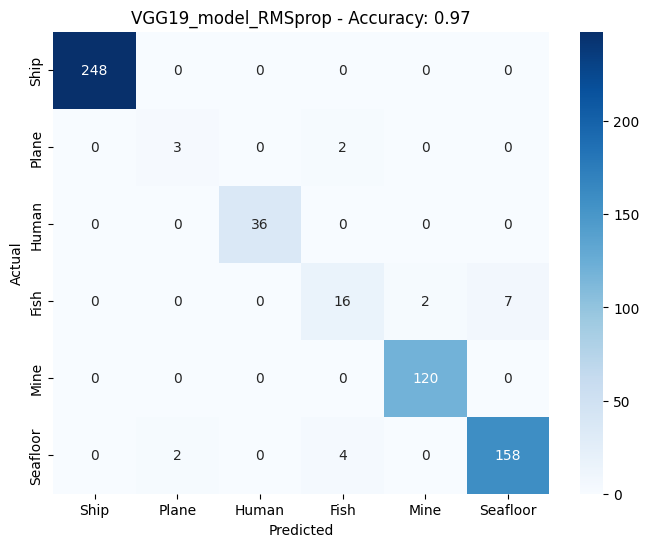

Accuracy for VGG19_model_RMSprop: 0.97
19/19 [==============================] - 14s 722ms/step


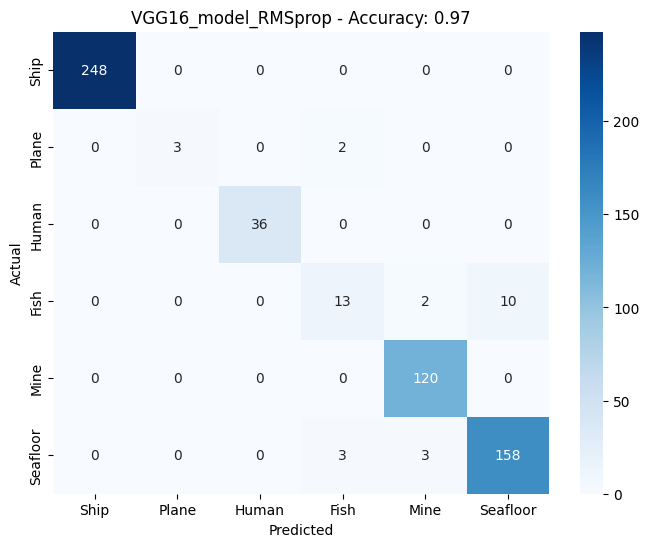

Accuracy for VGG16_model_RMSprop: 0.97
19/19 [==============================] - 9s 474ms/step


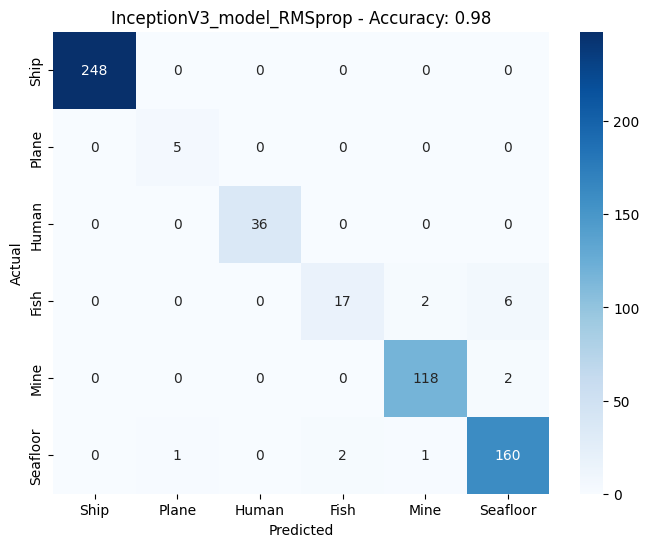

Accuracy for InceptionV3_model_RMSprop: 0.98
19/19 [==============================] - 15s 754ms/step


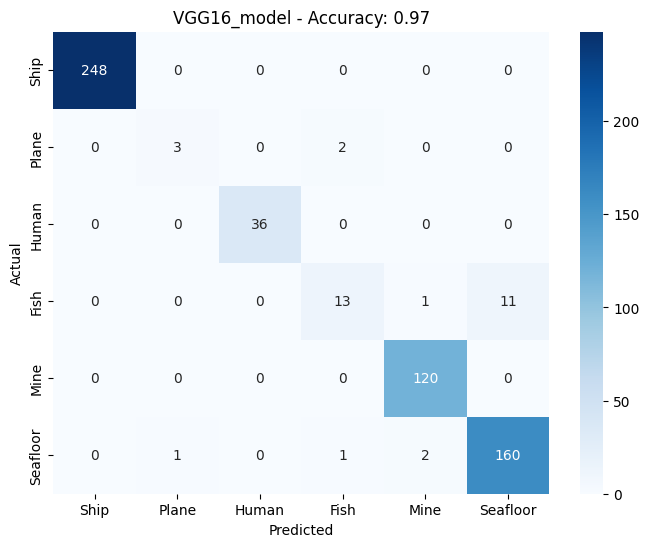

Accuracy for VGG16_model: 0.97
19/19 [==============================] - 18s 968ms/step


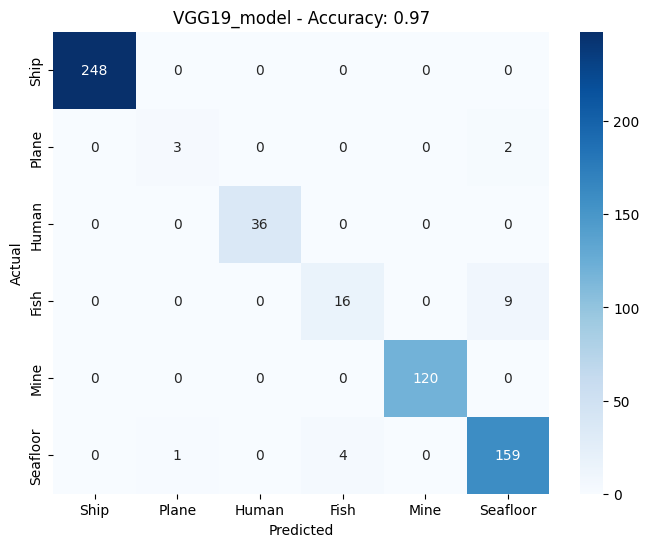

Accuracy for VGG19_model: 0.97
19/19 [==============================] - 4s 230ms/step


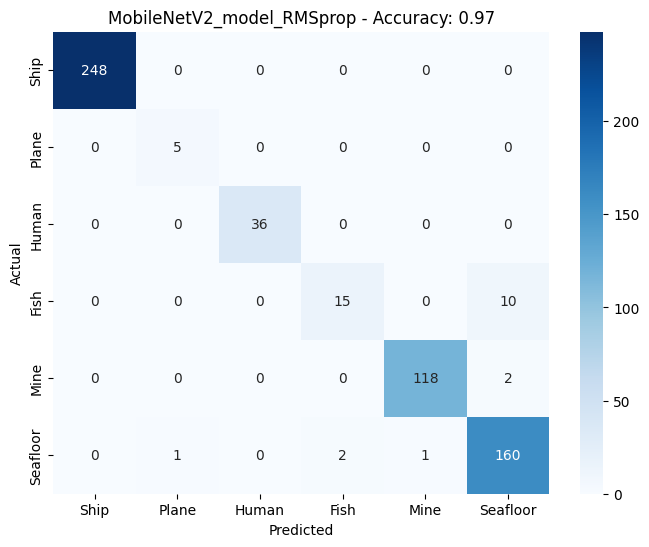

Accuracy for MobileNetV2_model_RMSprop: 0.97
19/19 [==============================] - 15s 808ms/step


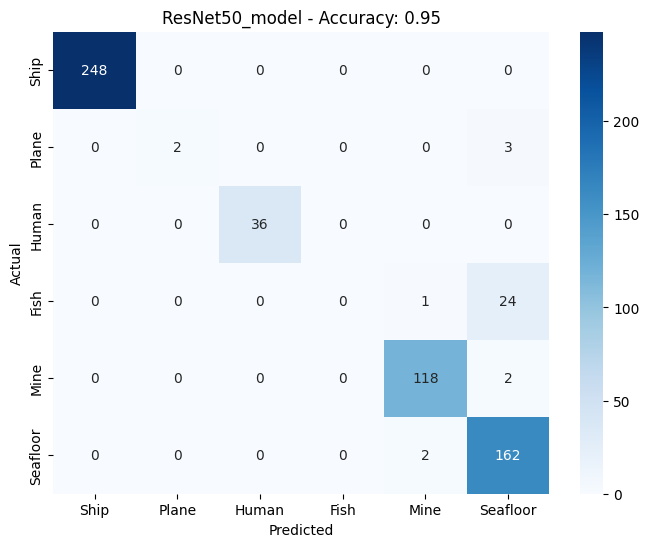

Accuracy for ResNet50_model: 0.95
19/19 [==============================] - 4s 188ms/step


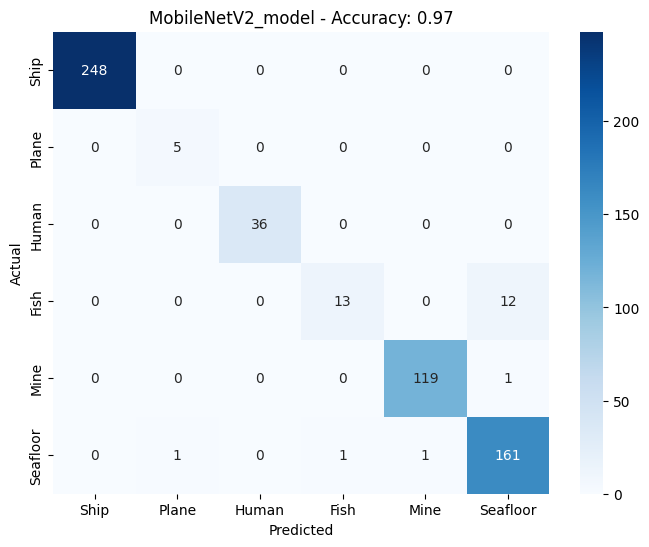

Accuracy for MobileNetV2_model: 0.97
19/19 [==============================] - 12s 619ms/step


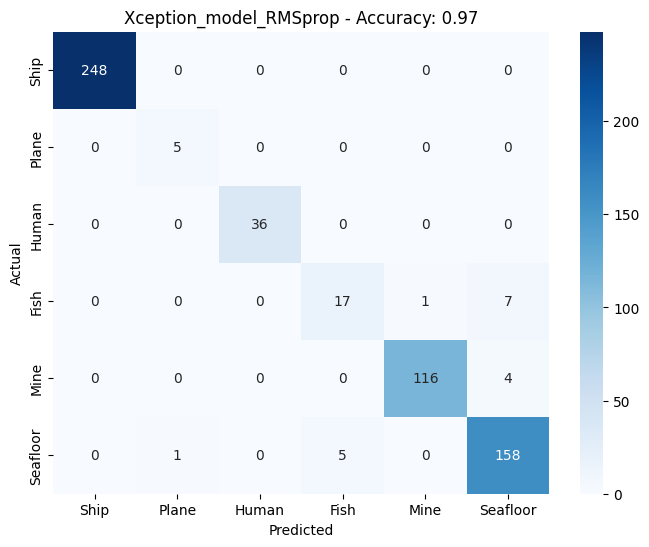

Accuracy for Xception_model_RMSprop: 0.97
19/19 [==============================] - 15s 781ms/step


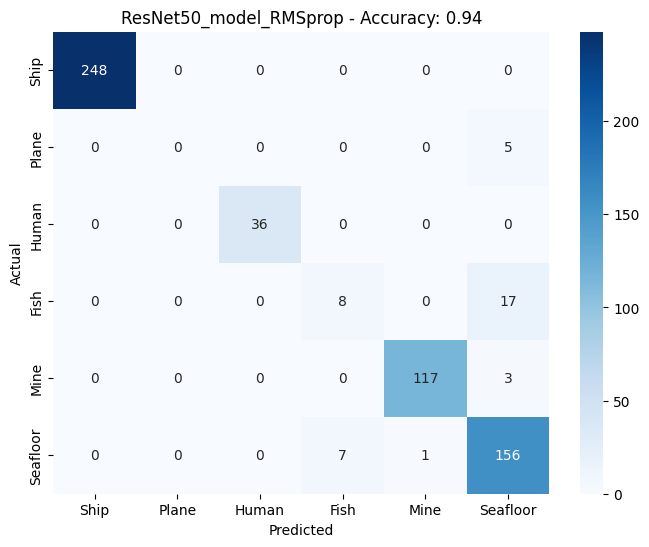

Accuracy for ResNet50_model_RMSprop: 0.94
19/19 [==============================] - 11s 566ms/step


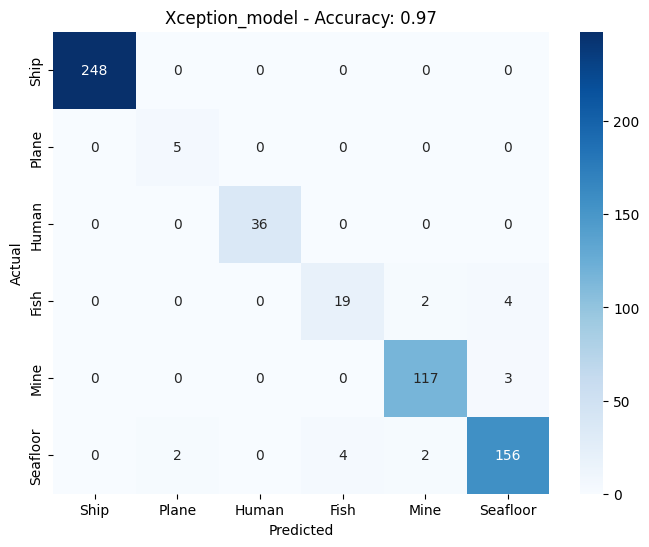

Accuracy for Xception_model: 0.97
19/19 [==============================] - 15s 779ms/step


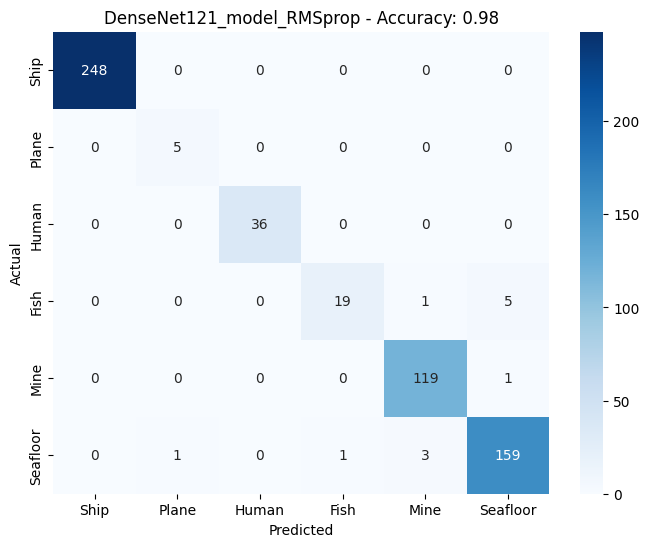

Accuracy for DenseNet121_model_RMSprop: 0.98
19/19 [==============================] - 17s 767ms/step


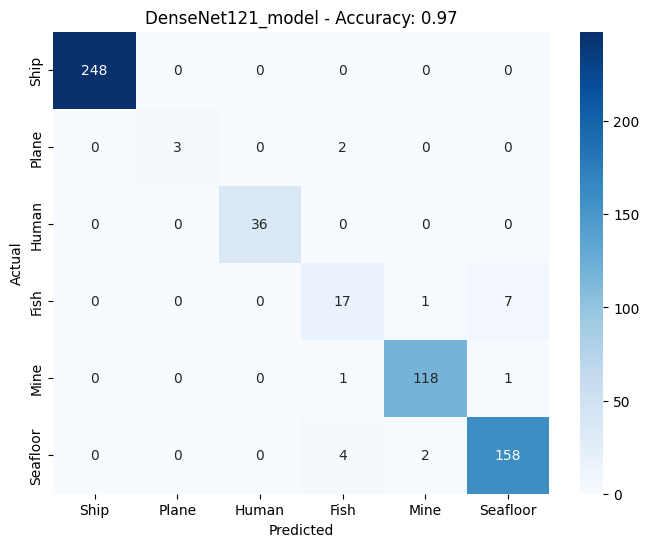

Accuracy for DenseNet121_model: 0.97
19/19 [==============================] - 6s 291ms/step


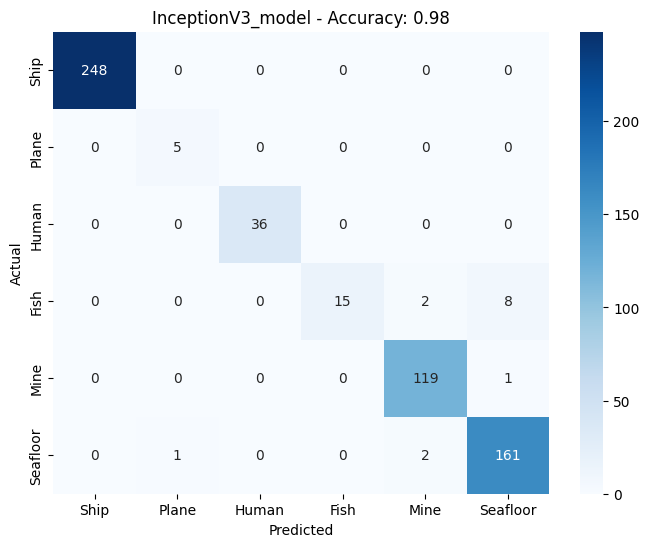

Accuracy for InceptionV3_model: 0.98


In [55]:
from sklearn.metrics import accuracy_score

for model_name, model in loaded_models.items():
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Calculate accuracy score
    accuracy = accuracy_score(y_true, y_pred)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"{model_name} - Accuracy: {accuracy:.2f}")  # Include accuracy in the title
    plt.show()

    # Print accuracy score
    print(f"Accuracy for {model_name}: {accuracy:.2f}")